In [22]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Datos sinteticos con piecewise linear + ruido
N = 200
x = np.short(np.random.uniform(-2, 2, N))
y = np.piecewise(x, [x < -1, (x >= -1) & (x < 0), (x >= 0) & (x < 1), x >= 1], [lambda x: -1.5*x -1, lambda x: 0.5*x + 0.5, lambda x: -2*x + 1, lambda x: x - 1]) + np.random.normal(0, 0.3, N)
x_test = np.linspace(-2, 2, 200)  # el mismo rango que x (-2 a 2)

In [23]:
def regression_tree_fit(x, y, max_depth=3, min_samples_split=5):
    """
    Árbol de regresión simple (recursive partitioning).
    Tecnología inversa: divide el espacio en regiones que minimizan RSS.
    """
    def find_best_split(x, y):
        best_split = None
        best_rss = np.inf
        
        for split in np.unique(x):
            left = x < split
            right = ~left
            if np.sum(left) < min_samples_split or np.sum(right) < min_samples_split:
                continue
            rss_left = np.sum((y[left] - np.mean(y[left]))**2)
            rss_right = np.sum((y[right] - np.mean(y[right]))**2)
            rss_total = rss_left + rss_right
            if rss_total < best_rss:
                best_rss = rss_total
                best_split = split
        return best_split, best_rss
    
    def build_tree(x, y, depth=0):
        if depth >= max_depth or len(y) < min_samples_split:
            return np.mean(y)  # hoja: media
        
        split, _ = find_best_split(x, y)
        if split is None:
            return np.mean(y)
        
        left = x < split
        right = ~left
        
        tree = {
            'split': split,
            'left': build_tree(x[left], y[left], depth + 1),
            'right': build_tree(x[right], y[right], depth + 1)
        }
        return tree
    
    return build_tree(x, y)

# Ajuste del árbol
tree = regression_tree_fit(x, y, max_depth=3)

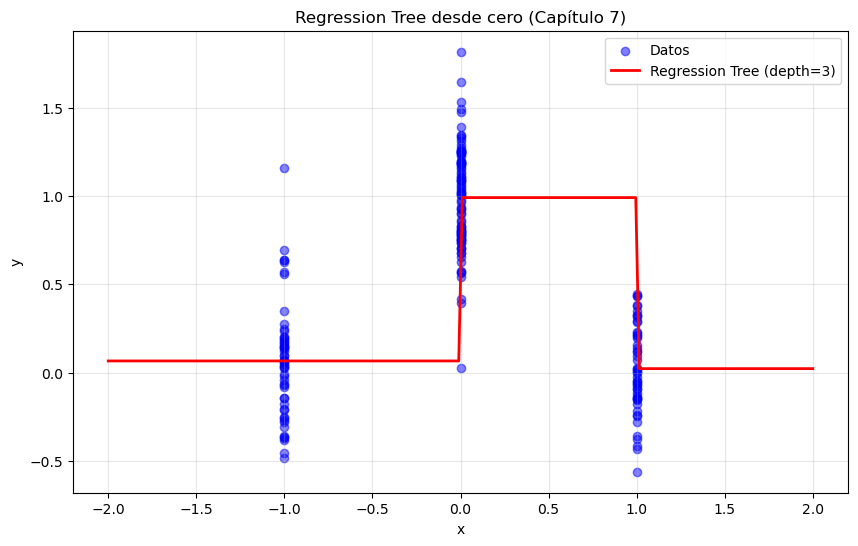

In [24]:
def predict_tree(tree, x):
    if not isinstance(tree, dict):
        return tree
    if x < tree['split']:
        return predict_tree(tree['left'], x)
    else:
        return predict_tree(tree['right'], x)

y_pred = np.array([predict_tree(tree, xi) for xi in x_test])

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.5, label='Datos')
plt.plot(x_test, y_pred, 'r-', linewidth=2, label='Regression Tree (depth=3)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression Tree desde cero (Capítulo 7)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

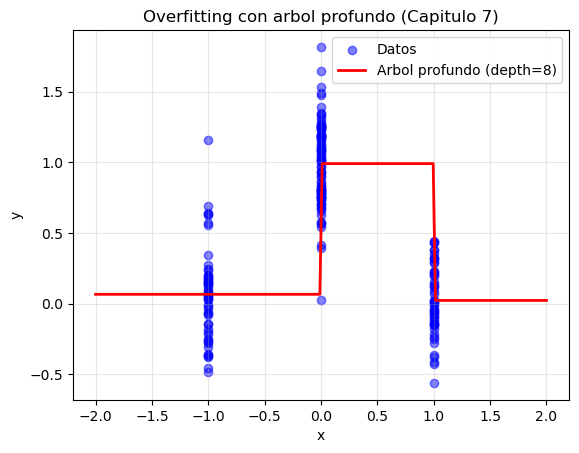

In [25]:
# Arbol mas profundo (overfitting)
tree_deep = regression_tree_fit(x, y, max_depth=8)

y_pred_deep = np.array([predict_tree(tree_deep, xi) for xi in x_test])

plt.Figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.5, label='Datos')
plt.plot(x_test, y_pred_deep, 'r-', linewidth=2, label='Arbol profundo (depth=8)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Overfitting con arbol profundo (Capitulo 7)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

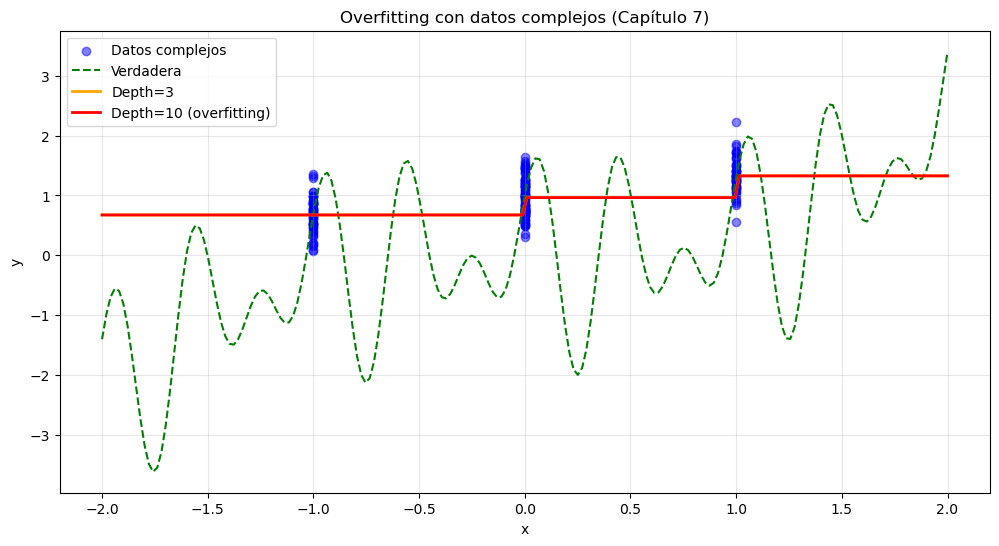

In [26]:
# Función verdadera más compleja (más ondas para forzar overfitting)
def true_function_complex(x):
    return np.sin(6 * np.pi * x) + np.cos(4 * np.pi * x) + 0.3 * x**3

y_complex = true_function_complex(x) + np.random.normal(0, 0.3, N)

# Árbol depth=3
tree_simple = regression_tree_fit(x, y_complex, max_depth=3)
y_pred_simple = np.array([predict_tree(tree_simple, xi) for xi in x_test])

# Árbol depth=10
tree_complex = regression_tree_fit(x, y_complex, max_depth=10)
y_pred_complex = np.array([predict_tree(tree_complex, xi) for xi in x_test])

plt.figure(figsize=(12, 6))
plt.scatter(x, y_complex, color='blue', alpha=0.5, label='Datos complejos')
plt.plot(x_test, true_function_complex(x_test), 'g--', label='Verdadera')
plt.plot(x_test, y_pred_simple, 'orange', linewidth=2, label='Depth=3')
plt.plot(x_test, y_pred_complex, 'r-', linewidth=2, label='Depth=10 (overfitting)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Overfitting con datos complejos (Capítulo 7)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()